This notebook checks whether the ramsar wetland polygon drill ran on all the polygons in the input shapefile.

_inputs_  
- a csv saved from the QGIS attribute table of the original shapefile
- path to the output directory containing results for each shapefile
- somewhere to save the output shapefile

load some modules

In [92]:
import xarray as xr
import pandas as pd
import csv
import os
import fiona
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

where is my csv?

In [4]:
path_to_csv_attribute_table = '/g/data/r78/rjd547/Ramsar_Wetlands/exploded_ramsar_attribute_table.csv'

read in the csv using pandas

In [5]:
ramsar_exploded = pd.read_csv(path_to_csv_attribute_table)

read filenames from directory, add to dataframe, and compare against ramsar list


In [11]:
#make an empty list of the files that ran
ramsars_run = []
#for each file in the output directory
for file in os.listdir('/g/data/r78/rjd547/Ramsar_Wetlands/Ramsar_Outputs_1/'):
    #if it's a csv file
    if file.endswith(".csv"):
        #add it to our list
        ramsars_run.append(file)  

look at the first five failed polyons

In [27]:
ramsars_run[0:5]

['Vasse-Wonnerup_System-Vasse-Wonnerup_System-WA-117.csv',
 'Ashmore_Reef_National_Nature_Reserve-Ashmore_Reef_National_Nature_Reserve-EXT-227.csv',
 'Moreton_Bay-Moreton_Bay-QLD-146.csv',
 'NSW_Central_Murray_State_Forests-Koondrook_Forest_Group-NSW-236.csv',
 'Moreton_Bay-Moreton_Bay-QLD-140.csv']

use the index of the wetland shapefile to get all the original shapefile indices

In [121]:
#get the shapefile index as a list
ramsar_exploded_index = ramsar_exploded.index.tolist()

use some string manipulation to get the index of the missing polgons out of the list of files in the output directory

In [39]:
#get list of runs
run_list = []
for i in ramsars_run:
    i = i.split('-') #break up filename
    i = i[-1] #get last bit
    i = i.split('.')[0]
    i =int(i)
    run_list.append(i)

use set math to find which indexes are present in the original list and not the output directory

In [45]:
missing_runs = set(ramsar_exploded_index) - set(run_list)
print(missing_runs)

{228, 229, 230, 231, 105, 266, 12, 93, 185, 90, 125}


In [53]:
#turn the set of missing runs back into a list
missing_runs = list(missing_runs)

In [122]:
# for wetland_number in missing_runs:
#     print (f'\'{ramsar_exploded.loc[wetland_number][3]}, OBJECTID:{ramsar_exploded.loc[wetland_number][0]}, ID:{ramsar_exploded.loc[wetland_number].name} \',')

In [109]:
#the original shapefile
ramsar_shapes =  '/g/data/r78/rjd547/Ramsar_Wetlands/ExplodedRAMSAR.shp'

open the original shapefile. Use the index ['id'] of the missing runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [117]:
with fiona.open(ramsar_shapes) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/Ramsar_Wetlands/ramsar_notrun_v1.shp','w',**meta) as outshape:
        for feature in inshape:
                if int(feature['id']) in missing_runs:
                    print(feature['properties']['WETLAND_NA'])   
                    outshape.write(feature)
                   
                    

Kakadu National Park
The Coorong, and Lakes Alexandrina and Albert Wetland
Coongie Lakes
Eighty-mile Beach
Hosnies Spring
Pulu Keeling National Park
Coral Sea Reserves (Coringa-Herald and Lihou Reefs and Cays)
Coral Sea Reserves (Coringa-Herald and Lihou Reefs and Cays)
Elizabeth and Middleton Reefs Marine National Nature Reserve
The Dales
Peery


open the new shapefile to check what was written out as a new shapefile.

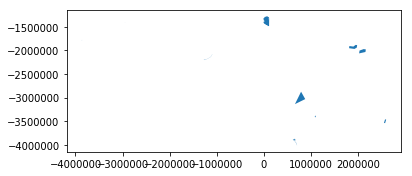

In [118]:
outshape_written = gpd.read_file('/g/data/r78/rjd547/Ramsar_Wetlands/ramsar_notrun_v1.shp')
outshape_written.plot()
plt.show()